# Qn 1a

In [1]:
import pandas as pd

f0_f1 = pd.read_csv('f0_f1.csv')
f0_f1_copy = f0_f1.copy()
f1_f2 = pd.read_csv('f1_f2.csv')
f1_f2_copy = f1_f2.copy()
f2_f3 = pd.read_csv('f2_f3.csv')
f2_f3_copy = f2_f3.copy()
f3_f4 = pd.read_csv('f3_f4.csv')
f3_f4_copy = f3_f4.copy()
f4_f5 = pd.read_csv('f4_f5.csv')
f4_f5_copy = f4_f5.copy()



gb_df = pd.concat([f0_f1_copy,f1_f2_copy,f2_f3_copy,f3_f4_copy,f4_f5_copy])
gb_df = gb_df.groupby('trace_id')[['f0','f1','f2','f3','f4','f5']].nunique().reset_index()
gb_df['count'] = gb_df.sum(axis=1,numeric_only=True)

newdataset = gb_df[['trace_id','count']].copy()
display(newdataset)

,trace_id,count
0,TRACE_PERSON_0000000003,16
1,TRACE_PERSON_0000000005,20
2,TRACE_PERSON_0000000011,5
3,TRACE_PERSON_0000000014,2
4,TRACE_PERSON_0000000016,20
...,...,...
311,TRACE_PERSON_0000000993,2
312,TRACE_PERSON_0000000994,13
313,TRACE_PERSON_0000000995,21
314,TRACE_PERSON_0000000998,6


# Qn 1b

Text(0, 0.5, 'Number of clusters with people count')

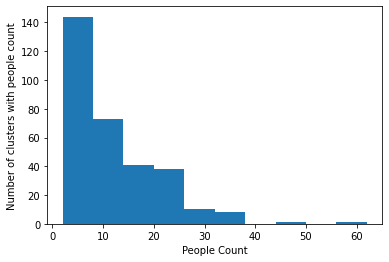

In [2]:
# this line required for matplot to work in jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt

#Create the figure where all the subplots will go
fig = plt.figure()

#Define axes1 as the first subplot, which will be the 1st plot in the 1x1 figure
axes1 = fig.add_subplot(1,1,1)
axes1.hist(newdataset['count'],bins=10)
axes1.set_xlabel('People Count')
axes1.set_ylabel('Number of clusters with people count')

## One insight that i draw from the diagram is that most of the clusters have only less than 10 people inside each cluster. This means that the spread of the virus is not as significant. 

## Another insight is that the distribution of the data did not exceed 60 people. This means that the spread of virus is not severe as people would have expected.

# Qn 1c

In [6]:
people_df = pd.read_csv('people.csv')
traceid_df = pd.concat([f0_f1,f1_f2,f2_f3,f3_f4,f4_f5])

unique_ids =  pd.unique(traceid_df.loc[:,['f0','f1','f2','f3','f4','f5']].values.ravel())

#from the person_df, check to see whose names are not in trace_id df
notInfected = people_df[~people_df['index'].isin(unique_ids)]
display(notInfected)

,index,name
1,PERSON_0000000001,Michael Curry
7,PERSON_0000000007,James Rodriguez
59,PERSON_0000000059,Harold Medina
62,PERSON_0000000062,Bobby Lopez
101,PERSON_0000000101,Connie Morales
142,PERSON_0000000142,Cynthia Middleton
184,PERSON_0000000184,Emma Thompson
199,PERSON_0000000199,Laurie Cooke
228,PERSON_0000000228,Anthony Young
237,PERSON_0000000237,Jamie Barnes


# Qn 1d

In [9]:
from functools import partial,reduce
import numpy as np

dfs = [f0_f1, f1_f2, f2_f3, f3_f4, f4_f5] 
outer_merge = partial(pd.merge, how='outer') 
final_dfs = reduce(outer_merge, dfs)

new_df = final_dfs[['trace_id','f0','f1','f2','f3','f4','f5']].copy()

def trace(traceID,personID):
    traces = new_df[np.equal.outer(new_df.to_numpy(copy=False), [traceID,personID]).any(axis=1).all(axis=1)]
    result_df = traces.sort_values(['f1'], ascending=True)
    result_df.drop_duplicates(inplace=True,ignore_index=True)
    return(result_df[['f0','f1','f2','f3','f4','f5']])
    
trace('TRACE_PERSON_0000000379','PERSON_0000000067')

,f0,f1,f2,f3,f4,f5
0,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
2,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456
3,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
4,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
5,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456


# Qn 1e

In [13]:
import numpy as np

def tracingPath(traceID, fromID, toID):
    indexFrom = []
    indexTo = []
    
    #function from 1d
    df = trace(traceID,toID)
    
    for row in df.iterrows():
        for indexes in row:
            fromIndex = np.where(indexes==fromID)
            toIndex = np.where(indexes==toID)
            if fromIndex[0] is not None: 
                indexFrom.extend(fromIndex[0])
            
            if toIndex[0] is not None:
                indexTo.extend(toIndex[0])
                
    print('Tracing path of requested IDs')
    display(df)
    
    print(f'TraceID: {traceID}, FromID: {fromID}, ToID: {toID}\n')

    rows = 0
    for fromTrace,toTrace in zip(indexFrom,indexTo):
        if toTrace - fromTrace == 1:
            relationship = 'Direct'
        else:
            relationship = 'Indirect'
        print(f'Row: {rows}: {relationship} Relationship')
        rows += 1
    

tracingPath('TRACE_PERSON_0000000379', 'PERSON_0000000889', 'PERSON_0000000067')

Tracing path of requested IDs


,f0,f1,f2,f3,f4,f5
0,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
2,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456
3,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
4,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
5,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456


TraceID: TRACE_PERSON_0000000379, FromID: PERSON_0000000889, ToID: PERSON_0000000067

Row: 0: Indirect Relationship
Row: 1: Direct Relationship
Row: 2: Direct Relationship
Row: 3: Indirect Relationship
Row: 4: Direct Relationship
Row: 5: Direct Relationship


# Qn 1f

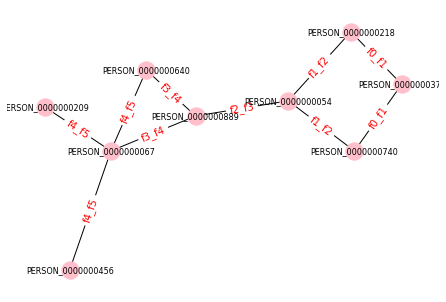

<Figure size 864x864 with 0 Axes>

In [151]:
import matplotlib.pyplot as plt
import networkx as nx

df = trace('TRACE_PERSON_0000000379', 'PERSON_0000000067')
g = nx.Graph()
ege = [[(a, b,'f0_f1'), (b, c,'f1_f2'), (c,d,'f2_f3'), (d,e,'f3_f4'), (e,f,'f4_f5')] for a, b, c, d, e, f in df.values]

item_list = []

for values in ege:
    for val in values:
        if val not in item_list:
            item_list.append(val)
            
    
for i in item_list:
    g.add_edge(i[0],i[1],edge_labels=i[2])
g.edges(data=True)

edge_labels = nx.get_edge_attributes(g, 'edge_labels')

pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='pink', pos = pos, font_size=8)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_color='red', )

plt.figure(figsize=(12,12))
plt.show()